In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
df = pd.read_csv("candy_data.csv")
df[:2]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936


In [4]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


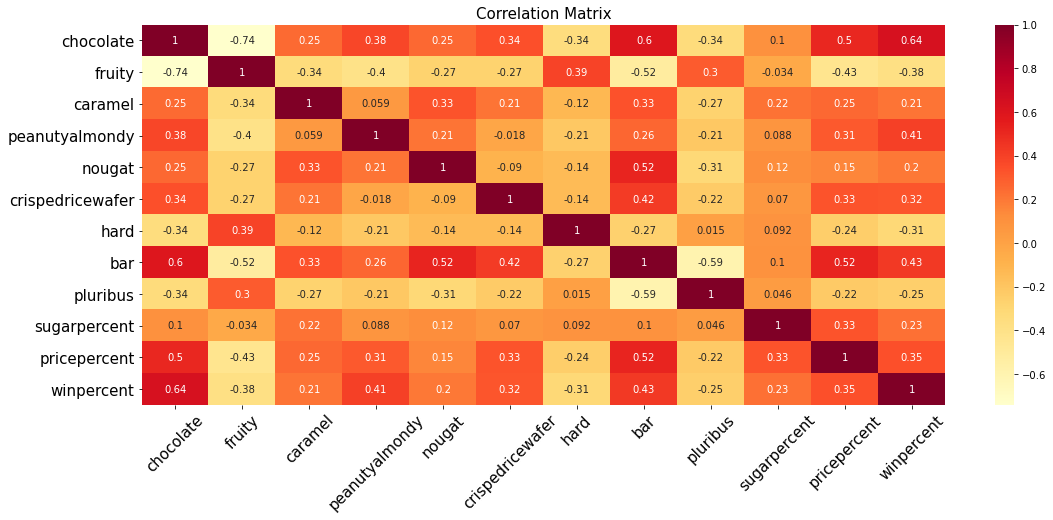

In [6]:
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap = "YlOrRd")
plt.title("Correlation Matrix", size = 15)
plt.xticks(size = 15, rotation = 45)
plt.yticks(size = 15)
plt.show()

### Model Validation

In [7]:
# Features
X = df[df.columns.drop(["competitorname", "winpercent"])]

# Target
y = df["winpercent"]

**Prediction on Training Set**

In [8]:
# Split Data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20)

# Initiate Random Forest Regressor Object
rf = RandomForestRegressor(n_estimators = 500, random_state = 21)

# The model is fit using X_train and y_train
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)

pd.DataFrame({"Actual": y_train, "Predicted": y_pred})[::5]

,Actual,Predicted
39,47.829754,52.124172
26,28.127439,34.197150
25,59.236122,58.303655
59,34.722000,40.127899
54,72.887901,72.575945
67,52.825947,52.985573
78,47.173229,47.207185
69,34.578991,36.623493
24,56.490501,58.303655
29,41.389557,39.768673


**Model Accuracy**

In [9]:
rmse = (MSE(y_train, y_pred)**(1/2)).round(2)
print("Root Mean Squared Error of Train Model =", rmse)

Root Mean Squared Error of Train Model = 4.68


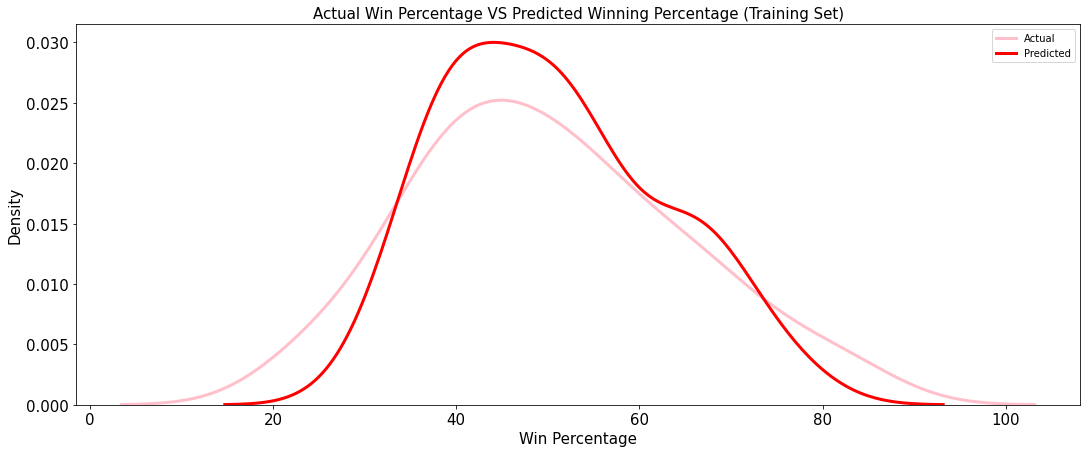

In [10]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df, x = y_train, label = "Actual", color = "pink", linewidth = 3)
sns.kdeplot(y_pred, label = "Predicted", color = "red", linewidth = 3)
plt.title("Actual Win Percentage VS Predicted Winning Percentage (Training Set)", size = 15)
plt.xlabel("Win Percentage", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

**Prediction on Test Set**

In [11]:
y_pred = rf.predict(X_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[:10]

,Actual,Predicted
32,71.465050,71.962910
46,46.296597,37.511296
19,34.158958,45.783819
6,56.914547,66.206519
61,55.103695,58.328429
80,45.466282,39.768673
10,38.975037,65.922494
42,70.735641,63.698521
13,42.272076,41.073976
27,57.219250,49.495768


In [12]:
rmse = (MSE(y_test, y_pred)**(1/2)).round(2)
print("Root Mean Squared Error of Test Model =", rmse)

Root Mean Squared Error of Test Model = 9.82


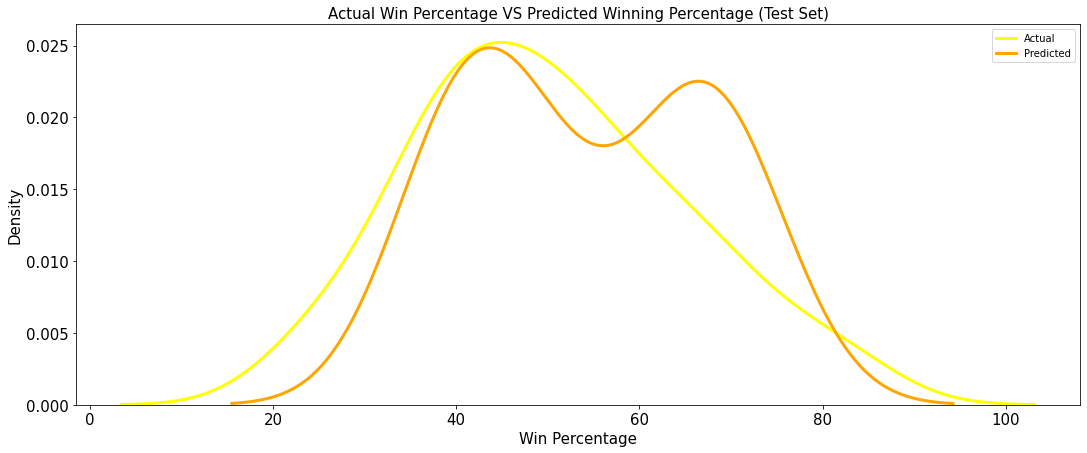

In [13]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df, x = y_train, label = "Actual", color = "yellow", linewidth = 3)
sns.kdeplot(y_pred, label = "Predicted", color = "orange", linewidth = 3)
plt.title("Actual Win Percentage VS Predicted Winning Percentage (Test Set)", size = 15)
plt.xlabel("Win Percentage", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

### Set Random Forest Regression Model Parameters

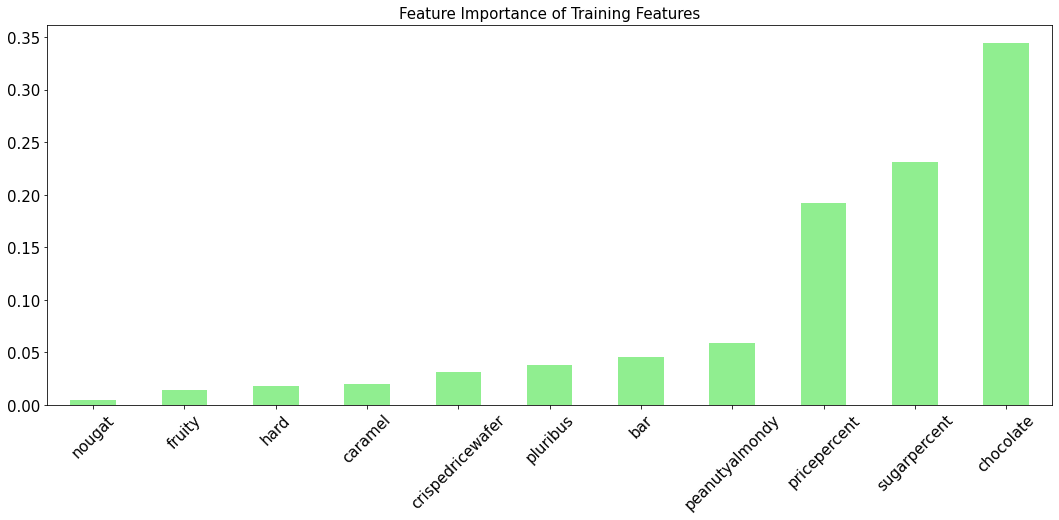

In [14]:
rfr = RandomForestRegressor(n_estimators = 100,
                            max_depth = 6,
                            random_state = 1111)

# Fit the model
rfr.fit(X_train, y_train)

# Features Importance
importance_rf = pd.Series(rfr.feature_importances_, index = X_train.columns)
importance_rf = importance_rf.sort_values()
importance_rf.plot(kind = "bar", color = "lightgreen", figsize = (18, 7))
plt.title("Feature Importance of Training Features", size = 15)
plt.xticks(size = 15, rotation = 45)
plt.yticks(size = 15)
plt.show()

### Error due to under/over-fitting

In [15]:
rfr = RandomForestRegressor(n_estimators = 25,
                            random_state = 42,
                            max_features = 2)

rfr.fit(X_train, y_train)

# Print the training and testing accuracies
print("Training Error =", MAE(y_train, rfr.predict(X_train)), "\n")
print("Testing Error =", MAE(y_test, rfr.predict(X_test)))

Training Error = 3.861241157382354 

Testing Error = 7.919073123607842


**Set max_features = 11**

In [16]:
rfr = RandomForestRegressor(n_estimators = 25,
                            random_state = 42,
                            max_features = 11)

rfr.fit(X_train, y_train)

# Print the training and testing accuracies
print("Training Error =", MAE(y_train, rfr.predict(X_train)), "\n")
print("Testing Error =", MAE(y_test, rfr.predict(X_test)))

Training Error = 3.6000040236960777 

Testing Error = 8.39541593541176


**Set max_feaures = 4**

In [17]:
rfr = RandomForestRegressor(n_estimators = 25,
                            random_state = 42,
                            max_features = 4)

rfr.fit(X_train, y_train)

# Print the training and testing accuracies
print("Training Error =", MAE(y_train, rfr.predict(X_train)), "\n")
print("Testing Error =", MAE(y_test, rfr.predict(X_test)))

Training Error = 3.5175823815392153 

Testing Error = 8.021614001764702


### KFold

In [18]:
Kf = KFold(n_splits = 5,
           shuffle = True,
           random_state = 21)

splits = Kf.split(X)

# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: %s" % len(train_index))
    print("Number of validation indices: %s" % len(val_index), "\n")

Number of training indices: 68
Number of validation indices: 17 

Number of training indices: 68
Number of validation indices: 17 

Number of training indices: 68
Number of validation indices: 17 

Number of training indices: 68
Number of validation indices: 17 

Number of training indices: 68
Number of validation indices: 17 



### Randomized Search CV

In [19]:
# Finish the dictionary by adding the max_depth parameter
param_dist = {"max_depth": [2, 4, 6, 8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]}

# Create a random forest regression model
rfr = RandomForestRegressor(n_estimators = 10,
                            random_state = 21)

# Build a random search
random_search = RandomizedSearchCV(estimator = rfr,
                                   param_distributions = param_dist,
                                   n_iter = 10,
                                   cv = 5)

random_search.fit(X_train, y_train)

y_pred_ran = random_search.predict(X_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred_ran})[:5]

,Actual,Predicted
32,71.465050,72.324284
46,46.296597,41.557750
19,34.158958,42.498190
6,56.914547,69.531697
61,55.103695,50.992219


In [20]:
random_search.best_params_

{'min_samples_split': 8, 'max_features': 10, 'max_depth': 4}

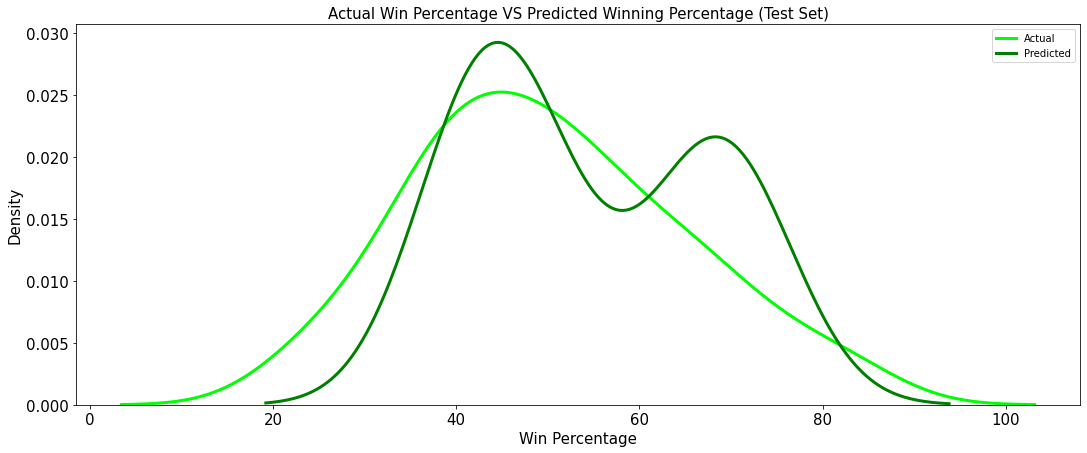

In [21]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_train, label = "Actual", color = "lime", linewidth = 3)
sns.kdeplot(y_pred_ran, label = "Predicted", color = "green", linewidth = 3)
plt.title("Actual Win Percentage VS Predicted Winning Percentage (Test Set)", size = 15)
plt.xlabel("Win Percentage", size = 15)
plt.ylabel("Density", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend()
plt.show()

In [22]:
score = MSE(y_test, y_pred_ran)**(0.5)
print("Root Mean Squared Error by Randomized Search CV =", score.round(2))

Root Mean Squared Error by Randomized Search CV = 9.13


### Import Tic Tac Toe Dataset

In [23]:
df = pd.read_csv("tic-tac-toe.csv")
df[:2]

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive


In [24]:
df.describe()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Top-Left       958 non-null    object
 1   Top-Middle     958 non-null    object
 2   Top-Right      958 non-null    object
 3   Middle-Left    958 non-null    object
 4   Middle-Middle  958 non-null    object
 5   Middle-Right   958 non-null    object
 6   Bottom-Left    958 non-null    object
 7   Bottom-Middle  958 non-null    object
 8   Bottom-Right   958 non-null    object
 9   Class          958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


In [26]:
# Features
X = df[df.columns.drop("Class")]

# Target
y = df["Class"]

**Convert Str into int**

In [27]:
mapping = {'X': 1, 'x': 1, 'o': 0, 'b': 0}

X = X.replace({'Top-Left': mapping, 
               'Top-Middle': mapping,
               'Top-Right': mapping,
               'Middle-Left': mapping,
               'Middle-Middle': mapping,
               'Middle-Right': mapping,
               'Bottom-Left': mapping,
               'Bottom-Middle': mapping,
               'Bottom-Right':mapping})

### Random Forest Classification

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3)

rfc = RandomForestClassifier(random_state = 42)

rfc.fit(X_train, y_train)

y_pred_c = rfc.predict(X_test)
pd.DataFrame({"Actual Class": y_test,
              "Predicted Class": y_pred_c})[:10]

,Actual Class,Predicted Class
634,negative,negative
893,negative,negative
443,positive,positive
860,negative,positive
295,positive,positive
780,negative,negative
569,positive,positive
222,positive,positive
278,positive,positive
535,positive,positive


In [29]:
pd.DataFrame({"Prediction": y_pred_c}).value_counts()

Prediction
positive      194
negative       94
dtype: int64

In [30]:
probability_predictions = rfc.predict_proba(X_test)
probability_predictions[0]

array([1., 0.])

In [31]:
score = accuracy_score(y_test, y_pred_c)
print("Accuracy score of Model =", score)

Accuracy score of Model = 0.9826388888888888


In [32]:
print(confusion_matrix(y_test, y_pred_c))

[[ 93   4]
 [  1 190]]


In [33]:
print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

    negative       0.99      0.96      0.97        97
    positive       0.98      0.99      0.99       191

    accuracy                           0.98       288
   macro avg       0.98      0.98      0.98       288
weighted avg       0.98      0.98      0.98       288



In [34]:
test_scores, train_scores = [], []

for i in [1, 2, 3, 4, 5, 10, 20, 50]:
    
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train)

    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)

    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The training scores were: [0.98, 0.98, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.96, 0.96, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98]


### Creating Train,  Test, and Validation Datasets

In [35]:
# Training Set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Training Set and Validation Set
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  train_size = 0.8,
                                                  random_state = 42)

In [36]:
rfc = RandomForestClassifier(n_estimators = 25,
                             max_features = 4,
                             random_state = 21)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=25, random_state=21)

**Model Performance on Validation Set**

In [37]:
y_pred_v = rfc.predict(X_val)
pd.DataFrame({"Actual": y_val,
              "Predicted": y_pred_v})[:5]

,Actual,Predicted
861,negative,negative
748,negative,negative
304,positive,positive
819,negative,negative
57,positive,positive


In [38]:
print(confusion_matrix(y_val, y_pred_v))

[[52  3]
 [ 0 99]]


In [39]:
print(classification_report(y_val, y_pred_v))

              precision    recall  f1-score   support

    negative       1.00      0.95      0.97        55
    positive       0.97      1.00      0.99        99

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154



**Model Performance on Test Set**

In [40]:
y_pred_t = rfc.predict(X_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": y_pred_t})[:5]

,Actual,Predicted
836,negative,negative
477,positive,positive
350,positive,positive
891,negative,negative
855,negative,negative


In [41]:
print(confusion_matrix(y_test, y_pred_t))

[[ 63   4]
 [  0 125]]


In [42]:
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        67
    positive       0.97      1.00      0.98       125

    accuracy                           0.98       192
   macro avg       0.98      0.97      0.98       192
weighted avg       0.98      0.98      0.98       192



### Cross Validation

In [43]:
rfc = RandomForestClassifier()

c = cross_val_score(rfc, X, y, cv = 5)
c

array([0.484375  , 0.94791667, 0.984375  , 0.90575916, 0.9947644 ])

In [44]:
print("Cross Validation Mean =", np.mean(c).round(2), "\n")

print("Cross Validation Standard Deviation =", np.std(c).round(2))

Cross Validation Mean = 0.86 

Cross Validation Standard Deviation = 0.19
